In [1]:
!git clone https://github.com/ArkZ10/Plant-Classification.git

Cloning into 'Plant-Classification'...
remote: Enumerating objects: 13726, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (90/90), done.
remote: Total 13726 (delta 2), reused 90 (delta 1), pack-reused 13635
Receiving objects: 100% (13726/13726), 362.50 MiB | 37.07 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (13714/13714), done.


# Data Pre-Processing

## Checking Image Resolutions in a Dataset
Reads each image, and collects the resolutions (dimensions) of the images to determine if they are uniform (all images have the same resolution) or non-uniform (images have different resolutions).

In [2]:
import cv2
import os

root_path = '/kaggle/working/Plant-Classification/Dataset'

resolution_set = set()

for root, dirs, files in os.walk(root_path):
    for image_file in files:
        image_path = os.path.join(root, image_file)
        image = cv2.imread(image_path)

        if image is not None:
            resolution = (image.shape[1], image.shape[0])
            resolution_set.add(resolution)
        else:
            print(f"Failed to read image: {image_path}")

# Check if the dataset has uniform resolutions
if len(resolution_set) == 1:
    print("The dataset has uniform resolutions.")
    print(f"Resolution: {resolution_set.pop()}")
else:
    print("The dataset has non-uniform resolutions.")
    print(f"Unique Resolutions: {resolution_set}")


The dataset has non-uniform resolutions.
Unique Resolutions: {(799, 484), (800, 791), (799, 548), (799, 438), (799, 502), (800, 501), (800, 620), (799, 630), (800, 400), (800, 519), (800, 638), (800, 702), (800, 528), (800, 647), (800, 711), (800, 656), (799, 532), (799, 239), (799, 541), (531, 800), (750, 600), (799, 550), (800, 549), (799, 495), (799, 614), (799, 559), (800, 558), (800, 677), (800, 448), (571, 799), (800, 567), (800, 512), (800, 631), (800, 457), (800, 576), (800, 521), (800, 640), (800, 222), (800, 777), (800, 350), (799, 534), (572, 800), (649, 800), (498, 768), (800, 542), (800, 487), (533, 799), (800, 432), (800, 551), (799, 671), (800, 560), (800, 386), (800, 505), (799, 744), (800, 450), (800, 743), (800, 624), (534, 800), (532, 800), (600, 800), (800, 651), (800, 770), (799, 527), (799, 536), (800, 416), (799, 600), (800, 544), (799, 554), (800, 434), (800, 553), (799, 618), (800, 498), (800, 617), (800, 443), (800, 562), (734, 800), (800, 800), (800, 507), (5

## Counting and Plotting the Number of Images in Each Class

Counts the number of images in each class within a dataset and visualizes the results using a bar chart.

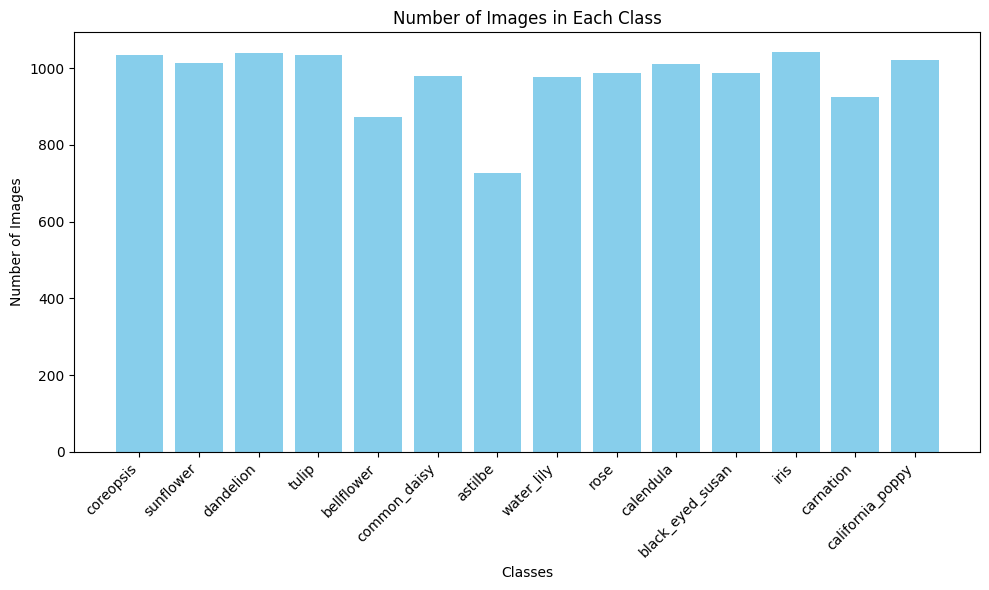

In [3]:
import os
import matplotlib.pyplot as plt

classes = os.listdir(root_path)

class_counts = {}

for class_name in classes:
    class_path = os.path.join(root_path, class_name)

    num_images = len(os.listdir(class_path))

    class_counts[class_name] = num_images

# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [4]:
from PIL import Image
import os

def get_image_sizes(root_dir):
    image_sizes = []

    for root, dirs, files in os.walk(root_dir):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                file_path = os.path.join(root, file)

                try:
                    with Image.open(file_path) as img:
                        size = img.size
                        image_sizes.append((file_path, size))
                except Exception as e:
                    print(f"Error processing image {file_path}: {str(e)}")

    return image_sizes

all_image_sizes = get_image_sizes(root_path)

## Splitting the Dataset into Training and Validation Sets

Splits a dataset of images into training and validation sets, organizing the images into separate directories for each class. It reads class directories from the dataset, creates corresponding training and validation directories, and uses train_test_split from sklearn.model_selection to divide the images with 80% allocated to training and 20% to validation. Each image is then copied to its respective directory using shutil. This ensures the dataset is structured for model training and evaluation, with reproducibility ensured by a fixed random seed.

In [5]:
from sklearn.model_selection import train_test_split
import os
import shutil

dataset_dir = '/kaggle/working/Plant-Classification/Dataset'

train_dir = '/kaggle/working/Train'
val_dir = '/kaggle/working/Val'

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

classes = [class_name for class_name in os.listdir(dataset_dir) if class_name in [ 'black_eyed_susan', 'calendula', 'california_poppy', 'common_daisy', 'coreopsis', 'dandelion', 'iris', 'rose', 'sunflower', 'tulip']]
random_seed = 42

In [6]:
for class_name in classes:
    class_dir = os.path.join(dataset_dir, class_name)
    train_class_dir = os.path.join(train_dir, class_name)
    val_class_dir = os.path.join(val_dir, class_name)

    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(val_class_dir, exist_ok=True)

    images = os.listdir(class_dir)

    train_images, val_images = train_test_split(images, test_size=0.2, random_state=random_seed)

    for image in train_images:
        src_path = os.path.join(class_dir, image)
        dest_path = os.path.join(train_class_dir, image)
        shutil.copy(src_path, dest_path)

    for image in val_images:
        src_path = os.path.join(class_dir, image)
        dest_path = os.path.join(val_class_dir, image)
        shutil.copy(src_path, dest_path)

print("Dataset split into training and validation sets.")

Dataset split into training and validation sets.


In [7]:
def count_files(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        count += len(files)
    return count

num_train_images = count_files(train_dir)
num_val_images = count_files(val_dir)

print(f"Number of images in the training set: {num_train_images}")
print(f"Number of images in the validation set: {num_val_images}")

Number of images in the training set: 8109
Number of images in the validation set: 2034


## Preparing Image Data Generators and Listing Image Files


Prepares image data generators for training and validation using TensorFlow's ImageDataGenerator, which applies real-time data augmentation to the training images, such as rescaling, rotations, shifts, shearing, and zooming, and only rescales the validation images. It configures the training generator to load images from a specified directory (train_dir) with a batch size of 20, target size of 256x256 pixels, and categorical class mode, while the validation generator similarly loads from val_dir without augmentation.



In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)

train_generator=  train_datagen.flow_from_directory(directory=train_dir,batch_size=20,class_mode='categorical',target_size=(256,256))

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_generator = validation_datagen.flow_from_directory(directory=val_dir,batch_size=20,class_mode='categorical',target_size=(256,256))

2024-06-06 18:47:16.852290: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-06 18:47:16.852404: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-06 18:47:17.115902: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 8109 images belonging to 10 classes.
Found 2034 images belonging to 10 classes.


In [9]:
base_dir = train_dir
black_eyed_susan_dir = os.path.join(base_dir, 'black_eyed_susan')
calendula_dir = os.path.join(base_dir, 'calendula')
california_poppy_dir = os.path.join(base_dir, 'california_poppy')
common_daisy_dir = os.path.join(base_dir, 'common_daisy')
coreopsis_dir = os.path.join(base_dir, 'coreopsis')
dandelion_dir = os.path.join(base_dir, 'dandelion')
iris_dir = os.path.join(base_dir, 'iris')
rose_dir = os.path.join(base_dir, 'rose')
sunflower_dir = os.path.join(base_dir, 'sunflower')
tulip_dir = os.path.join(base_dir, 'tulip')

black_eyed_susan_files = os.listdir(black_eyed_susan_dir)
calendula_files = os.listdir(calendula_dir)
california_poppy_files = os.listdir(california_poppy_dir)
common_daisy_files = os.listdir(common_daisy_dir)
coreopsis_files = os.listdir(coreopsis_dir)
dandelion_files = os.listdir(dandelion_dir)
iris_files = os.listdir(iris_dir)
rose_files = os.listdir(rose_dir)
sunflower_files = os.listdir(sunflower_dir)
tulip_files = os.listdir(tulip_dir)


In [10]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_black_eyed_susan = [os.path.join(black_eyed_susan_dir, fname)
                for fname in black_eyed_susan_files[pic_index-2:pic_index]]

next_calendula = [os.path.join(calendula_dir, fname)
                for fname in calendula_files[pic_index-2:pic_index]]

next_california_poppy = [os.path.join(california_poppy_dir, fname)
                for fname in california_poppy_files[pic_index-2:pic_index]]

next_common_daisy = [os.path.join(common_daisy_dir, fname)
                for fname in common_daisy_files[pic_index-2:pic_index]]

next_coreopsis = [os.path.join(coreopsis_dir, fname)
                for fname in coreopsis_files[pic_index-2:pic_index]]

next_dandelion = [os.path.join(dandelion_dir, fname)
                for fname in dandelion_files[pic_index-2:pic_index]]

next_iris = [os.path.join(iris_dir, fname)
                for fname in iris_files[pic_index-2:pic_index]]

next_rose = [os.path.join(rose_dir, fname)
                for fname in rose_files[pic_index-2:pic_index]]

next_sunflower = [os.path.join(sunflower_dir, fname)
                for fname in sunflower_files[pic_index-2:pic_index]]

next_tulip = [os.path.join(tulip_dir, fname)
                for fname in tulip_files[pic_index-2:pic_index]]


## Image Visualization

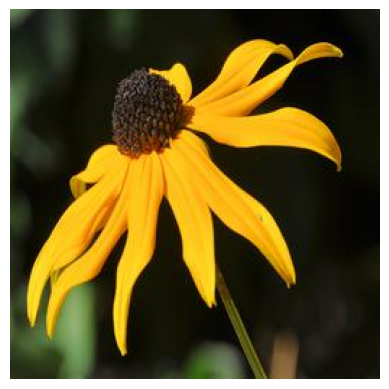

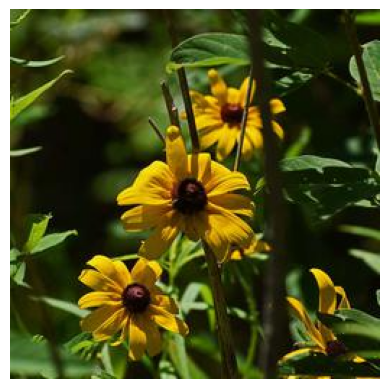

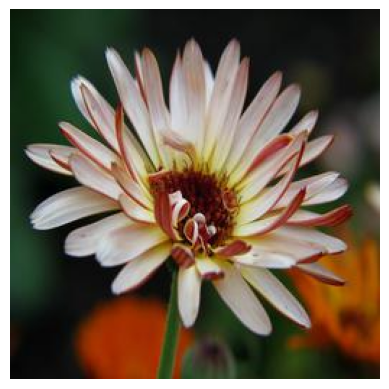

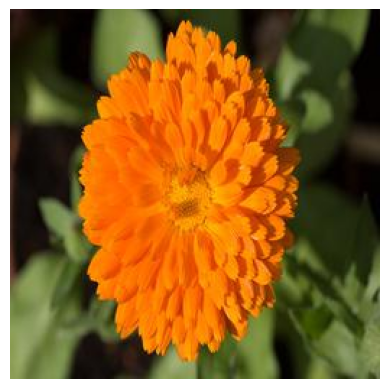

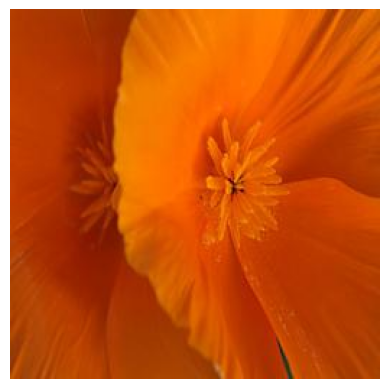

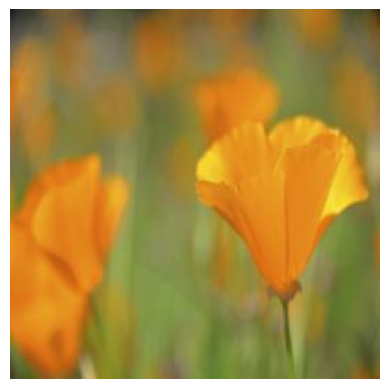

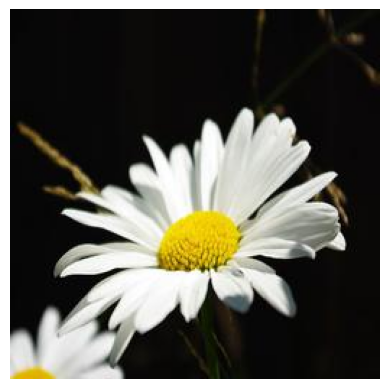

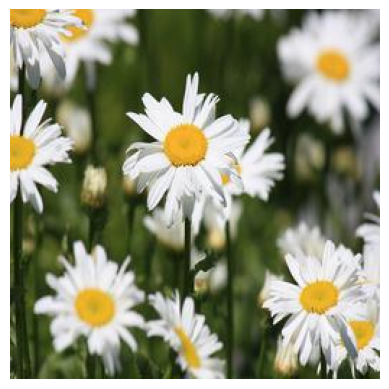

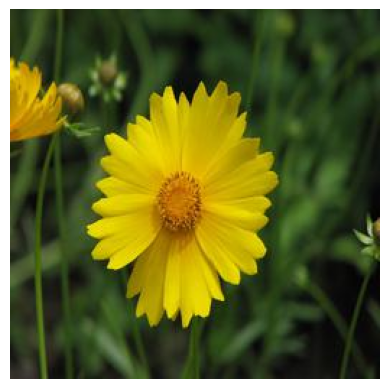

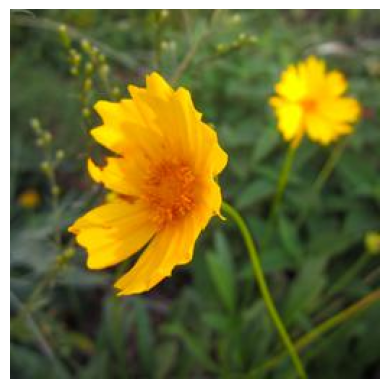

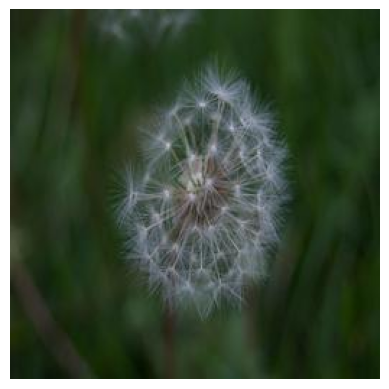

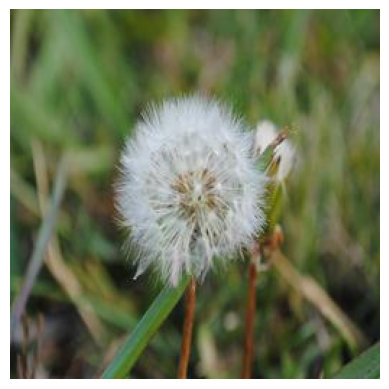

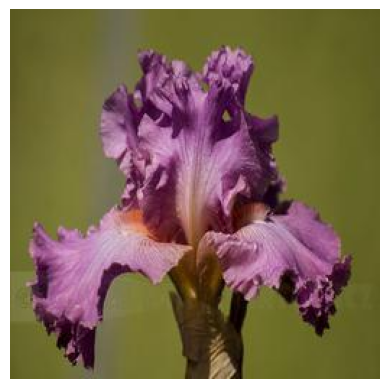

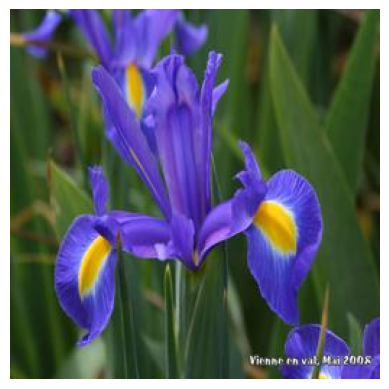

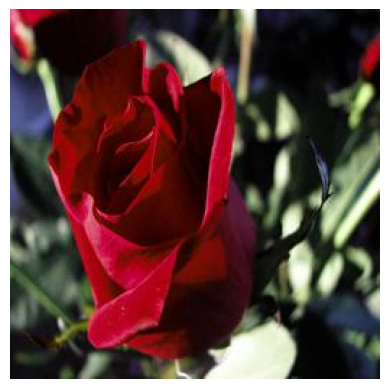

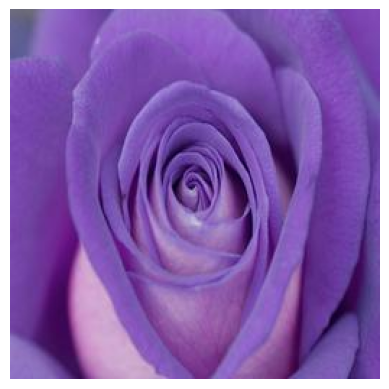

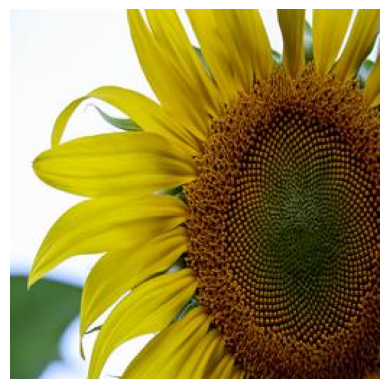

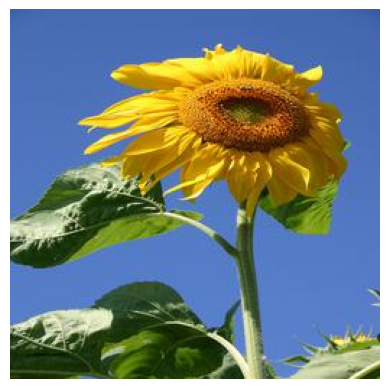

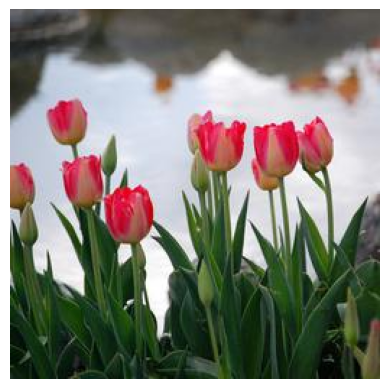

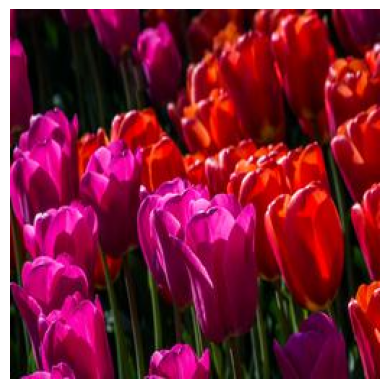

In [11]:
for i, img_path in enumerate(next_black_eyed_susan+next_calendula+next_california_poppy+
                             next_common_daisy+next_coreopsis+next_dandelion+next_iris+next_rose+next_sunflower+next_tulip):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

# Model Training

## Regular Conv2D & Maxpooling

This Convolutional Neural Network (CNN) model consists of multiple layers using TensorFlow's Keras API for image classification tasks. It begins with a Conv2D layer employing 128 filters with a kernel size of 5x5, 'valid' padding, and ReLU activation, processing input images of size 256x256 pixels with 3 channels (RGB). This is followed by a MaxPooling2D layer with a 2x2 pool size, which reduces the spatial dimensions of the feature maps while retaining important features.

In [12]:
import tensorflow as tf
from tensorflow.keras.regularizers import l2

model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (5,5), padding='valid', activation='relu', input_shape = (256,256,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (3,3), padding='valid', activation='relu', kernel_regularizer=l2(0.00005)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(32, (3,3), padding='valid', activation='relu', kernel_regularizer=l2(0.00005)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(32, (3,3), padding='valid', activation='relu', kernel_regularizer=l2(0.00005)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation='softmax'),
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 252, 252, 128)  │         9,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 124, 124, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 62, 62, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,605,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,720,714 (6.56 MB)

 Trainable params: 1,720,202 (6.56 MB)

 Non-trainable params: 512 (2.00 KB)

In [14]:
optimizer1 = 'adam'
model1.compile(loss = 'categorical_crossentropy', optimizer=optimizer1, metrics=['accuracy'])

In [15]:
history1 = model1.fit(
        train_generator,
        validation_data = validation_generator,
        epochs= 20
    )

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/406 ━━━━━━━━━━━━━━━━━━━━ 3:13:11 29s/step - accuracy: 0.1500 - loss: 3.2938

I0000 00:00:1717699688.971691     135 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1717699688.998624     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


160/406 ━━━━━━━━━━━━━━━━━━━━ 1:33 379ms/step - accuracy: 0.2779 - loss: 3.8380

W0000 00:00:1717699749.131673     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


406/406 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.3160 - loss: 3.3470

W0000 00:00:1717699824.878117     136 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


406/406 ━━━━━━━━━━━━━━━━━━━━ 172s 355ms/step - accuracy: 0.3161 - loss: 3.3455 - val_accuracy: 0.3574 - val_loss: 1.9071
Epoch 2/20


W0000 00:00:1717699832.820812     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


406/406 ━━━━━━━━━━━━━━━━━━━━ 130s 315ms/step - accuracy: 0.4666 - loss: 1.6659 - val_accuracy: 0.5211 - val_loss: 1.3967
Epoch 3/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 131s 317ms/step - accuracy: 0.5280 - loss: 1.3701 - val_accuracy: 0.6313 - val_loss: 1.0934
Epoch 4/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 130s 315ms/step - accuracy: 0.5567 - loss: 1.2719 - val_accuracy: 0.6465 - val_loss: 1.0729
Epoch 5/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 131s 316ms/step - accuracy: 0.5842 - loss: 1.1969 - val_accuracy: 0.6563 - val_loss: 0.9897
Epoch 6/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 130s 315ms/step - accuracy: 0.6066 - loss: 1.1345 - val_accuracy: 0.6441 - val_loss: 1.0831
Epoch 7/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 131s 316ms/step - accuracy: 0.6033 - loss: 1.1450 - val_accuracy: 0.6431 - val_loss: 0.9963
Epoch 8/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 129s 313ms/step - accuracy: 0.6154 - loss: 1.1034 - val_accuracy: 0.6770 - val_loss: 0.9869
Epoch 9/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 129s 313ms/step - accuracy: 0.6532 - loss: 1.00

## Transfer Learning (InceptionV3)

This model leverages transfer learning with InceptionV3, a pretrained convolutional neural network (CNN) from Keras Applications, initialized with weights downloaded locally (local_weights_file). The subsequent model2 is constructed by appending two Conv2D layers with 64 filters each, ReLU activation, and L2 regularization (0.001), followed by MaxPooling2D layers for spatial reduction.

In [16]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/kaggle/working/Plant-Classification/Pre-Trained Model/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pretrained_model = InceptionV3(input_shape=(256,256,3),
                               include_top = False,
                               weights = None)

pretrained_model.load_weights(local_weights_file)

for layer in pretrained_model.layers:
  layer.trainable = False

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, Activation, LeakyReLU
from tensorflow.keras.regularizers import l2

model2 = tf.keras.models.Sequential()
model2.add(pretrained_model)

model2.add(Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model2.add(MaxPooling2D(3,3))

model2.add(Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model2.add(MaxPooling2D(1,1))

model2.add(Dense(64, activation='relu'))
model2.add(Flatten())

model2.add(Dense(10, activation='softmax'))

In [18]:
model2.build(input_shape=(None, 256, 256, 3))
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 6, 6, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_98 (Conv2D)              │ (None, 6, 6, 64)       │     1,179,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_99 (Conv2D)              │ (None, 2, 2, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2, 2, 64)       │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,026,154 (87.84 MB)

 Trainable params: 1,223,370 (4.67 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [19]:
optimizer1 = 'adam'
model2.compile(loss = 'categorical_crossentropy', optimizer=optimizer1, metrics=['accuracy'])

In [20]:
history2 = model2.fit(
        train_generator,
        validation_data = validation_generator,
        epochs= 20,
    )

Epoch 1/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 189s 398ms/step - accuracy: 0.6104 - loss: 1.2953 - val_accuracy: 0.8191 - val_loss: 0.6931
Epoch 2/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 131s 318ms/step - accuracy: 0.8161 - loss: 0.7235 - val_accuracy: 0.8289 - val_loss: 0.6697
Epoch 3/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 131s 317ms/step - accuracy: 0.8554 - loss: 0.6290 - val_accuracy: 0.8786 - val_loss: 0.6022
Epoch 4/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 131s 316ms/step - accuracy: 0.8623 - loss: 0.6135 - val_accuracy: 0.8550 - val_loss: 0.6427
Epoch 5/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 131s 317ms/step - accuracy: 0.8675 - loss: 0.6085 - val_accuracy: 0.8869 - val_loss: 0.5621
Epoch 6/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 131s 317ms/step - accuracy: 0.8807 - loss: 0.5756 - val_accuracy: 0.8712 - val_loss: 0.6200
Epoch 7/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 131s 316ms/step - accuracy: 0.8761 - loss: 0.5932 - val_accuracy: 0.8987 - val_loss: 0.5354
Epoch 8/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 130s 316ms/step - accuracy: 0.8797 -

## Using LeakyReLU

This model constructs a Convolutional Neural Network (CNN) model (model3) using TensorFlow's Keras API for image classification with 10 classes. It features two Conv2D layers with 128 filters each and 3x3 kernels, both followed by LeakyReLU activations with an alpha of 0.02, allowing small gradients when neurons are not active.

In [21]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, Activation, LeakyReLU
from tensorflow.keras.regularizers import l2

model3 = tf.keras.models.Sequential()

model3.add(Conv2D(128, (3,3), input_shape=(256,256,3)))
model3.add(LeakyReLU(alpha=0.02))

model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(128, (3, 3)))
model3.add(LeakyReLU(alpha=0.02))

model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(GlobalMaxPooling2D())

model3.add(Dense(512))
model3.add(LeakyReLU(alpha=0.02))
model3.add(Dropout(0.5))

model3.add(Dense(10, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [22]:
model3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_100 (Conv2D)             │ (None, 254, 254, 128)  │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 254, 254, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 127, 127, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 127, 127, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_101 (Conv2D)             │ (None, 125, 125, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 125, 125, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 62, 62, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,346 (868.54 KB)

 Trainable params: 222,346 (868.54 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
optimizer1 = 'adam'
model3.compile(loss = 'categorical_crossentropy', optimizer=optimizer1, metrics=['accuracy'])

In [24]:
history3 = model3.fit(
        train_generator,
        validation_data = validation_generator,
        epochs= 20
    )

Epoch 1/20
  1/406 ━━━━━━━━━━━━━━━━━━━━ 2:49:54 25s/step - accuracy: 0.1000 - loss: 2.4098

W0000 00:00:1717704978.170196     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


191/406 ━━━━━━━━━━━━━━━━━━━━ 1:05 304ms/step - accuracy: 0.2713 - loss: 1.9716

2024-06-06 20:17:24.682361: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng4{k11=1} for conv (f32[9,128,127,127]{3,2,1,0}, u8[0]{0}) custom-call(f32[9,128,125,125]{3,2,1,0}, f32[128,128,3,3]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-06-06 20:17:24.842180: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.159944087s
Trying algorithm eng4{k11=1} for conv (f32[9,128,127,127]{3,2,1,0}, u8[0]{0}) custom-call(f32[9,128,125,125]{3,2,1,0}, f32[128,128,3,3]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardInput", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...


406/406 ━━━━━━━━━━━━━━━━━━━━ 169s 355ms/step - accuracy: 0.3465 - loss: 1.7569 - val_accuracy: 0.5644 - val_loss: 1.2552
Epoch 2/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 128s 310ms/step - accuracy: 0.5827 - loss: 1.1539 - val_accuracy: 0.6563 - val_loss: 1.0494
Epoch 3/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 127s 307ms/step - accuracy: 0.6390 - loss: 1.0044 - val_accuracy: 0.6765 - val_loss: 0.9967
Epoch 4/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 127s 306ms/step - accuracy: 0.6604 - loss: 0.9328 - val_accuracy: 0.7011 - val_loss: 0.9117
Epoch 5/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 126s 306ms/step - accuracy: 0.6913 - loss: 0.8716 - val_accuracy: 0.7173 - val_loss: 0.8152
Epoch 6/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 125s 303ms/step - accuracy: 0.7111 - loss: 0.8286 - val_accuracy: 0.7453 - val_loss: 0.7539
Epoch 7/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 125s 303ms/step - accuracy: 0.7290 - loss: 0.7675 - val_accuracy: 0.7483 - val_loss: 0.7631
Epoch 8/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 125s 301ms/step - accuracy: 0.7303 - loss: 0.75

## Transfer Learning (InceptionV3) and LeakyReLU

This model constructs a Convolutional Neural Network (CNN) model (model4) for image classification using TensorFlow's Keras API, integrating a pretrained InceptionV3 model as a feature extractor. The model then adds multiple Conv2D layers with 128 filters, each followed by BatchNormalization and LeakyReLU activation with an alpha of 0.02, enhancing the network's ability to learn complex patterns while maintaining stability and allowing small gradient flows for inactive neurons.

In [25]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

local_weights_file = '/kaggle/working/Plant-Classification/Pre-Trained Model/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pretrained_model = InceptionV3(input_shape=(256,256,3),
                               include_top = False,
                               weights = None)

pretrained_model.load_weights(local_weights_file)

for layer in pretrained_model.layers:
  layer.trainable = False

In [26]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, Activation, LeakyReLU, BatchNormalization
from tensorflow.keras.regularizers import l2

model4 = tf.keras.models.Sequential()
model4.add(pretrained_model)

model4.add(Conv2D(128, (3,3)))
model4.add(BatchNormalization())
model4.add(LeakyReLU(alpha=0.02))

model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

model4.add(Conv2D(128, (2, 2)))
model4.add(BatchNormalization())
model4.add(LeakyReLU(alpha=0.02))

model4.add(MaxPooling2D(pool_size=(1, 1)))
model4.add(Dropout(0.25))

model4.add(Conv2D(128, (1,1)))
model4.add(BatchNormalization())
model4.add(LeakyReLU(alpha=0.02))

model4.add(MaxPooling2D(pool_size=(1, 1)))
model4.add(Dropout(0.25))

model4.add(Conv2D(128, (1,1)))
model4.add(BatchNormalization())
model4.add(LeakyReLU(alpha=0.02))

model4.add(MaxPooling2D(pool_size=(1, 1)))
model4.add(Dropout(0.25))

model4.add(GlobalMaxPooling2D())

model4.add(Dense(512))
model4.add(LeakyReLU(alpha=0.02))
model4.add(Dropout(0.5))

model4.add(Dense(10, activation='softmax'))

In [27]:
model4.build(input_shape=(None, 256, 256, 3))
model4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 6, 6, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_196 (Conv2D)             │ (None, 4, 4, 128)      │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_192         │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_197 (Conv2D)             │ (None, 1, 1, 128)      │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_193         │ (None, 1, 1, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_198 (Conv2D)             │ (None, 1, 1, 128)      │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_194         │ (None, 1, 1, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_199 (Conv2D)             │ (None, 1, 1, 128)      │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_195         │ (None, 1, 1, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_1          │ (None, 128)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 24,334,122 (92.83 MB)

 Trainable params: 2,530,314 (9.65 MB)

 Non-trainable params: 21,803,808 (83.17 MB)

In [28]:
optimizer1 = 'adam'
model4.compile(loss = 'categorical_crossentropy', optimizer=optimizer1, metrics=['accuracy'])

In [29]:
history4 = model4.fit(
            train_generator,
            validation_data = validation_generator,
            epochs= 20
            )

Epoch 1/20
 80/406 ━━━━━━━━━━━━━━━━━━━━ 2:41 495ms/step - accuracy: 0.2095 - loss: 2.2041

W0000 00:00:1717707596.147765     135 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


406/406 ━━━━━━━━━━━━━━━━━━━━ 185s 382ms/step - accuracy: 0.4131 - loss: 1.6425 - val_accuracy: 0.8289 - val_loss: 0.5068
Epoch 2/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 128s 311ms/step - accuracy: 0.7457 - loss: 0.7851 - val_accuracy: 0.8407 - val_loss: 0.4716
Epoch 3/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 129s 313ms/step - accuracy: 0.7942 - loss: 0.6581 - val_accuracy: 0.8255 - val_loss: 0.5700
Epoch 4/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 128s 310ms/step - accuracy: 0.8149 - loss: 0.6043 - val_accuracy: 0.8564 - val_loss: 0.3985
Epoch 5/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 142s 310ms/step - accuracy: 0.8313 - loss: 0.5338 - val_accuracy: 0.9017 - val_loss: 0.2949
Epoch 6/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 129s 312ms/step - accuracy: 0.8496 - loss: 0.4947 - val_accuracy: 0.8918 - val_loss: 0.3491
Epoch 7/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 128s 310ms/step - accuracy: 0.8393 - loss: 0.5027 - val_accuracy: 0.8953 - val_loss: 0.3283
Epoch 8/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 129s 312ms/step - accuracy: 0.8554 - loss: 0.48

## Transfer Learning (VGG16)

This model constructs a Convolutional Neural Network (CNN) model (model5) for image classification using TensorFlow's Keras API, starting with the pretrained VGG16 model as a feature extractor, initialized with ImageNet weights and without the top classification layers.

In [30]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, Activation, LeakyReLU, BatchNormalization
from keras.applications import VGG16

In [31]:
vgg = VGG16(input_shape = (256,256,3), weights = 'imagenet', include_top = False)

for layer in vgg.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [32]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, Activation, LeakyReLU, BatchNormalization
from tensorflow.keras.regularizers import l2

model5 = tf.keras.models.Sequential()
model5.add(vgg)

model5.add(Conv2D(32, (3,3)))
model5.add(BatchNormalization())
model5.add(LeakyReLU(alpha=0.02))

model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))

model5.add(Conv2D(32, (2, 2)))
model5.add(BatchNormalization())
model5.add(LeakyReLU(alpha=0.02))

model5.add(MaxPooling2D(pool_size=(1, 1)))
model5.add(Dropout(0.25))

model5.add(Conv2D(128, (1,1)))
model5.add(BatchNormalization())
model5.add(LeakyReLU(alpha=0.02))

model5.add(MaxPooling2D(pool_size=(1, 1)))
model5.add(Dropout(0.25))

model5.add(Conv2D(128, (1,1)))
model5.add(BatchNormalization())
model5.add(LeakyReLU(alpha=0.02))

model5.add(MaxPooling2D(pool_size=(1, 1)))
model5.add(Dropout(0.25))

model5.add(GlobalMaxPooling2D())

model5.add(Dense(32))

model5.add(LeakyReLU(alpha=0.02))
model5.add(Dropout(0.5))

model5.add(Dense(10, activation='softmax'))

In [33]:
model5.build(input_shape=(None, 256, 256, 3))
model5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_200 (Conv2D)             │ (None, 6, 6, 32)       │       147,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_196         │ (None, 6, 6, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 3, 3, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_201 (Conv2D)             │ (None, 2, 2, 32)       │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_197         │ (None, 2, 2, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 2, 2, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_202 (Conv2D)             │ (None, 2, 2, 128)      │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_198         │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_203 (Conv2D)             │ (None, 2, 2, 128)      │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_199         │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_2          │ (None, 128)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 14,892,778 (56.81 MB)

 Trainable params: 177,450 (693.16 KB)

 Non-trainable params: 14,715,328 (56.13 MB)

In [34]:
optimizer1 = 'adam'
model5.compile(loss = 'categorical_crossentropy', optimizer=optimizer1, metrics=['accuracy'])

In [35]:
history5 = model5.fit(
        train_generator,
        validation_data = validation_generator,
        epochs= 20
    )

Epoch 1/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 229s 451ms/step - accuracy: 0.2143 - loss: 2.5299 - val_accuracy: 0.6254 - val_loss: 1.1733
Epoch 2/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 133s 323ms/step - accuracy: 0.4902 - loss: 1.4743 - val_accuracy: 0.7453 - val_loss: 0.8595
Epoch 3/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 133s 322ms/step - accuracy: 0.6243 - loss: 1.1522 - val_accuracy: 0.7999 - val_loss: 0.6804
Epoch 4/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 133s 322ms/step - accuracy: 0.6758 - loss: 1.0230 - val_accuracy: 0.8083 - val_loss: 0.5758
Epoch 5/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 134s 324ms/step - accuracy: 0.6999 - loss: 0.9556 - val_accuracy: 0.8368 - val_loss: 0.5005
Epoch 6/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 134s 326ms/step - accuracy: 0.7427 - loss: 0.8443 - val_accuracy: 0.8368 - val_loss: 0.5315
Epoch 7/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 135s 326ms/step - accuracy: 0.7494 - loss: 0.8080 - val_accuracy: 0.8736 - val_loss: 0.4339
Epoch 8/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 136s 329ms/step - accuracy: 0.7533 -

## Transfer Learning (ResNet50)

This model constructs a Convolutional Neural Network (CNN) model (model6) for image classification, leveraging the pretrained ResNet50 model as a feature extractor. ResNet50, initialized with ImageNet weights and excluding the top classification layers (include_top=False), has its layers set to non-trainable to preserve the learned features. This design enhances ResNet50's powerful feature extraction with robust, additional layers for improved classification performance.

In [36]:
from tensorflow.keras.applications import ResNet50

pretrained_model = ResNet50(input_shape=(256, 256, 3),
                            include_top=False,
                            weights='imagenet')

for layer in pretrained_model.layers:
    layer.trainable = False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [37]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, Activation, LeakyReLU, BatchNormalization
from tensorflow.keras.regularizers import l2

model6 = tf.keras.models.Sequential()
model6.add(pretrained_model)

model6.add(Conv2D(128, (3,3)))
model6.add(BatchNormalization())
model6.add(LeakyReLU(alpha=0.02))

model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Dropout(0.25))

model6.add(Conv2D(128, (2, 2)))
model6.add(BatchNormalization())
model6.add(LeakyReLU(alpha=0.02))

model6.add(MaxPooling2D(pool_size=(1, 1)))
model6.add(Dropout(0.25))

model6.add(Conv2D(128, (1,1)))
model6.add(BatchNormalization())
model6.add(LeakyReLU(alpha=0.02))

model6.add(MaxPooling2D(pool_size=(1, 1)))
model6.add(Dropout(0.25))

model6.add(Conv2D(128, (1,1)))
model6.add(BatchNormalization())
model6.add(LeakyReLU(alpha=0.02))

model6.add(MaxPooling2D(pool_size=(1, 1)))
model6.add(Dropout(0.25))

model6.add(GlobalMaxPooling2D())

model6.add(Dense(512))
model6.add(LeakyReLU(alpha=0.02))
model6.add(Dropout(0.5))

model6.add(Dense(10, activation='softmax'))

In [38]:
model6.build(input_shape=(None, 256, 256, 3))
model6.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 8, 8, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_204 (Conv2D)             │ (None, 6, 6, 128)      │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_200         │ (None, 6, 6, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_205 (Conv2D)             │ (None, 2, 2, 128)      │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_201         │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_206 (Conv2D)             │ (None, 2, 2, 128)      │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_202         │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_15 (LeakyReLU)      │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_207 (Conv2D)             │ (None, 2, 2, 128)      │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_203         │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_16 (LeakyReLU)      │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_3          │ (None, 128)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 26,119,050 (99.64 MB)

 Trainable params: 2,530,314 (9.65 MB)

 Non-trainable params: 23,588,736 (89.98 MB)

In [39]:
optimizer1 = 'adam'
model6.compile(loss = 'categorical_crossentropy', optimizer=optimizer1, metrics=['accuracy'])

In [40]:
history6 = model6.fit(
            train_generator,
            validation_data = validation_generator,
            epochs= 20
            )

Epoch 1/20
  2/406 ━━━━━━━━━━━━━━━━━━━━ 39s 98ms/step - accuracy: 0.1375 - loss: 2.8117   

W0000 00:00:1717712941.386484     137 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


406/406 ━━━━━━━━━━━━━━━━━━━━ 176s 361ms/step - accuracy: 0.1139 - loss: 2.4750 - val_accuracy: 0.1681 - val_loss: 2.2123
Epoch 2/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 123s 299ms/step - accuracy: 0.1573 - loss: 2.2349 - val_accuracy: 0.1735 - val_loss: 2.1949
Epoch 3/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 122s 295ms/step - accuracy: 0.1557 - loss: 2.2032 - val_accuracy: 0.1239 - val_loss: 2.3122
Epoch 4/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 123s 299ms/step - accuracy: 0.1695 - loss: 2.1794 - val_accuracy: 0.1952 - val_loss: 2.1085
Epoch 5/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 122s 295ms/step - accuracy: 0.1947 - loss: 2.1208 - val_accuracy: 0.1967 - val_loss: 2.0737
Epoch 6/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 122s 295ms/step - accuracy: 0.2301 - loss: 2.0442 - val_accuracy: 0.2675 - val_loss: 1.8948
Epoch 7/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 123s 299ms/step - accuracy: 0.2581 - loss: 1.9640 - val_accuracy: 0.2089 - val_loss: 2.2533
Epoch 8/20
406/406 ━━━━━━━━━━━━━━━━━━━━ 123s 297ms/step - accuracy: 0.2790 - loss: 1.93

# Evaluation

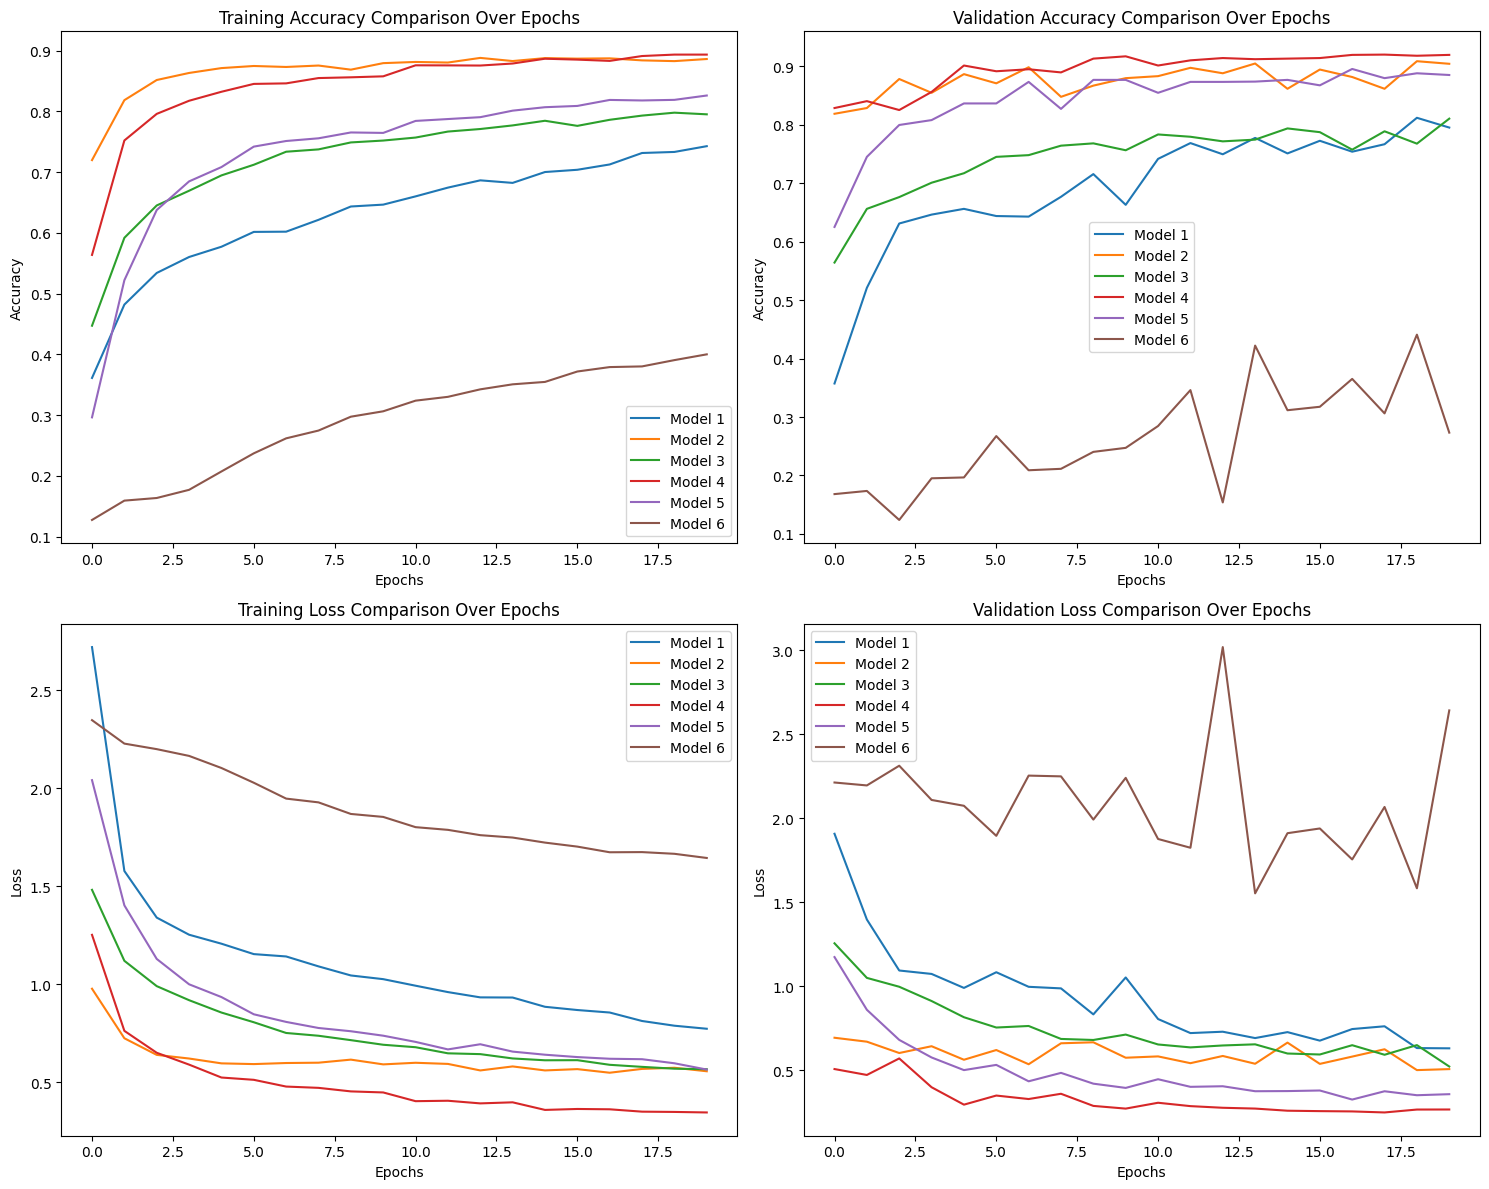

In [41]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(15, 12))

axs[0, 0].plot(history1.history['accuracy'], label='Model 1')
axs[0, 0].plot(history2.history['accuracy'], label='Model 2')
axs[0, 0].plot(history3.history['accuracy'], label='Model 3')
axs[0, 0].plot(history4.history['accuracy'], label='Model 4')
axs[0, 0].plot(history5.history['accuracy'], label='Model 5')
axs[0, 0].plot(history6.history['accuracy'], label='Model 6')
axs[0, 0].set_title('Training Accuracy Comparison Over Epochs')
axs[0, 0].set_xlabel('Epochs')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].legend()

axs[0, 1].plot(history1.history['val_accuracy'], label='Model 1')
axs[0, 1].plot(history2.history['val_accuracy'], label='Model 2')
axs[0, 1].plot(history3.history['val_accuracy'], label='Model 3')
axs[0, 1].plot(history4.history['val_accuracy'], label='Model 4')
axs[0, 1].plot(history5.history['val_accuracy'], label='Model 5')
axs[0, 1].plot(history6.history['val_accuracy'], label='Model 6')
axs[0, 1].set_title('Validation Accuracy Comparison Over Epochs')
axs[0, 1].set_xlabel('Epochs')
axs[0, 1].set_ylabel('Accuracy')
axs[0, 1].legend()

axs[1, 0].plot(history1.history['loss'], label='Model 1')
axs[1, 0].plot(history2.history['loss'], label='Model 2')
axs[1, 0].plot(history3.history['loss'], label='Model 3')
axs[1, 0].plot(history4.history['loss'], label='Model 4')
axs[1, 0].plot(history5.history['loss'], label='Model 5')
axs[1, 0].plot(history6.history['loss'], label='Model 6')
axs[1, 0].set_title('Training Loss Comparison Over Epochs')
axs[1, 0].set_xlabel('Epochs')
axs[1, 0].set_ylabel('Loss')
axs[1, 0].legend()

axs[1, 1].plot(history1.history['val_loss'], label='Model 1')
axs[1, 1].plot(history2.history['val_loss'], label='Model 2')
axs[1, 1].plot(history3.history['val_loss'], label='Model 3')
axs[1, 1].plot(history4.history['val_loss'], label='Model 4')
axs[1, 1].plot(history5.history['val_loss'], label='Model 5')
axs[1, 1].plot(history6.history['val_loss'], label='Model 6')
axs[1, 1].set_title('Validation Loss Comparison Over Epochs')
axs[1, 1].set_xlabel('Epochs')
axs[1, 1].set_ylabel('Loss')
axs[1, 1].legend()

plt.tight_layout()
plt.show()
